In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

In [83]:
# Load the data
data = pd.read_csv('train_data.csv')

In [84]:
# Drop the columns we won't be using
columns_to_drop = ['datasetId', 'uuid', 'condition']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

X = data.drop(columns='HR', axis=1) 
y = data[['HR']]

print("Shape of features (X):", X.shape)
print("Shape of Heart Rate (y):", y.shape)

Shape of features (X): (5000, 33)
Shape of Heart Rate (y): (5000, 1)


In [85]:
# Choose the "features" (columns) we want to use in our model
selected_features = ['MEAN_RR', 'MEDIAN_RR','SDRR_RMSSD_REL_RR', 'LF_NU', 'HF_NU', 'HF_PCT','HF_LF','RMSSD', 'SDSD','pNN25', 'pNN50','SDRR_REL_RR', 'SDSD_REL_RR','VLF','TP','KURT','SD2', 'LF']
X = data[selected_features] 
y = data['HR'] 

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [86]:
# Create parameters to pass into the model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse', 
    'max_depth': 16,
    'num_leaves': 18,
    'learning_rate': 0.08,
    'verbose': 1,
    'force_col_wise': True
}

In [87]:
# Train the model
lgb_model = lgb.train(params,
                      train_data,
                      num_boost_round=1200,  
                      valid_sets=[train_data, valid_data],
                    )

[LightGBM] [Info] Total Bins 4403
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 18
[LightGBM] [Info] Start training from score 74.091822


In [88]:
# Make predictions using the testing data
pred_gdb = lgb_model.predict(X_valid)

In [89]:
# Calculate the absolute errors
mse = mean_squared_error(y_valid, pred_gdb)
r2 = r2_score(y_valid, pred_gdb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.06813171786183257
R-squared (R2) Score: 0.9993486547412208


In [90]:
# Save the model
model_filename_txt = 'lgb_model.txt'
lgb_model.save_model(model_filename_txt, num_iteration=1200)

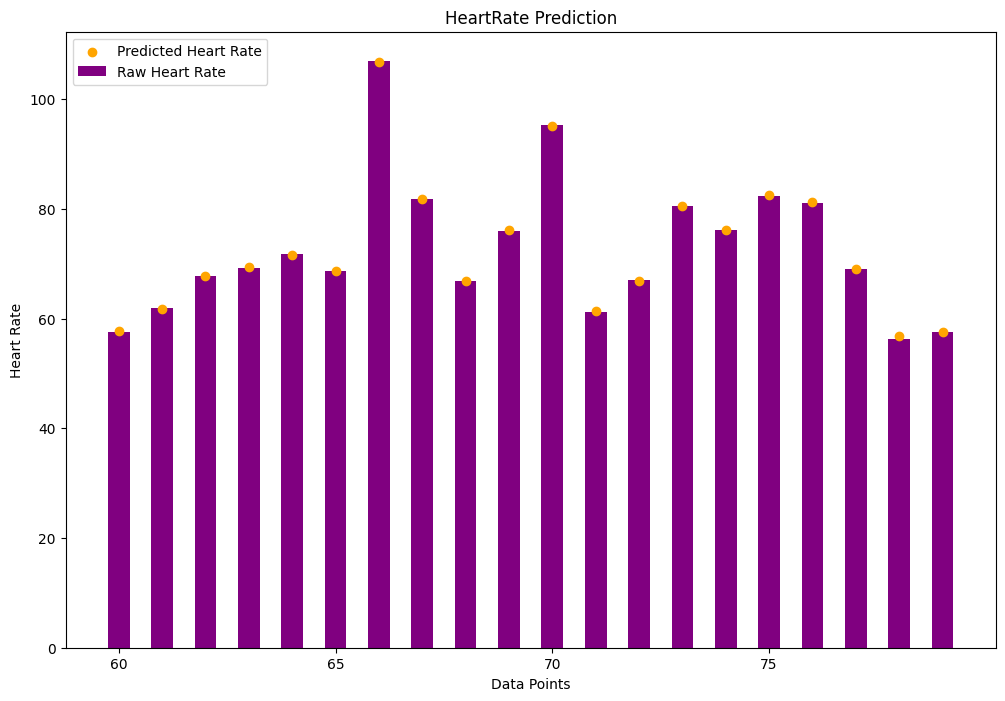

In [91]:
#Generating some examples of comparison between predicted and real heart rate

# Example 1
plt.figure(figsize=(12, 8))
plt.bar(range(60,80), y_valid[60:80], color = 'purple', label="Raw Heart Rate", width=0.5)
plt.scatter(range(60,80), pred_gdb[60:80], color = 'orange', label="Predicted Heart Rate")
plt.xticks(np.arange(60,80,5))
plt.xlabel("Data Points")
plt.ylabel("Heart Rate")
plt.title("HeartRate Prediction")
plt.legend(loc="upper left")
plt.show()

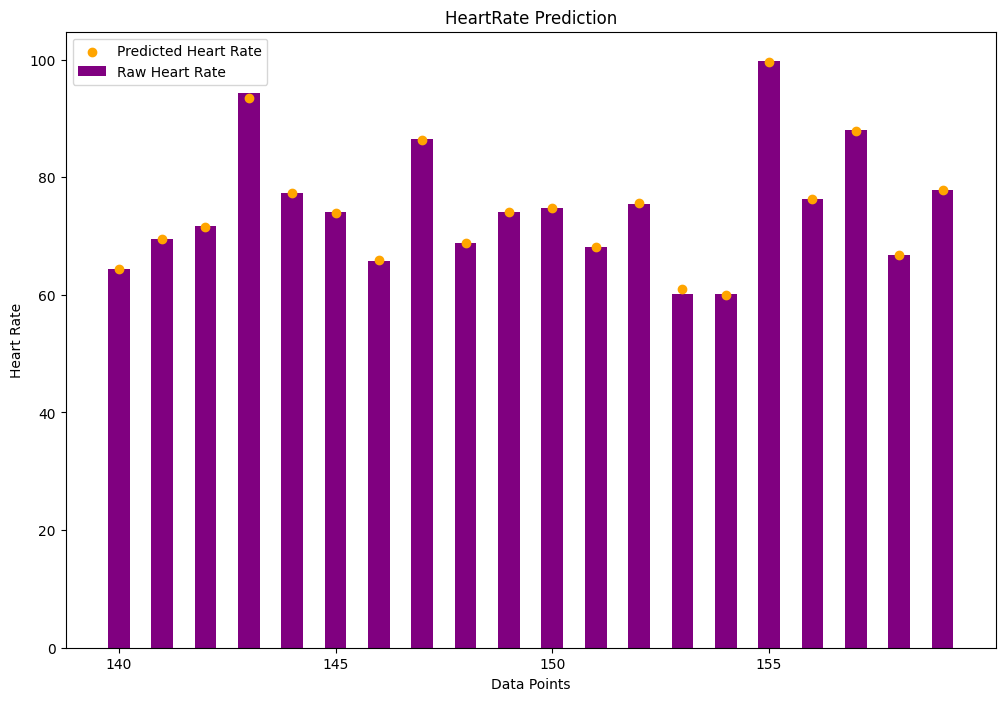

In [92]:
# Example 2

plt.figure(figsize=(12, 8))
plt.bar(range(140,160), y_valid[140:160], color = 'purple', label="Raw Heart Rate", width=0.5)
plt.scatter(range(140,160), pred_gdb[140:160], color = 'orange', label="Predicted Heart Rate")
plt.xticks(np.arange(140,160,5))
plt.xlabel("Data Points")
plt.ylabel("Heart Rate")
plt.title("HeartRate Prediction")
plt.legend(loc="upper left")
plt.show()

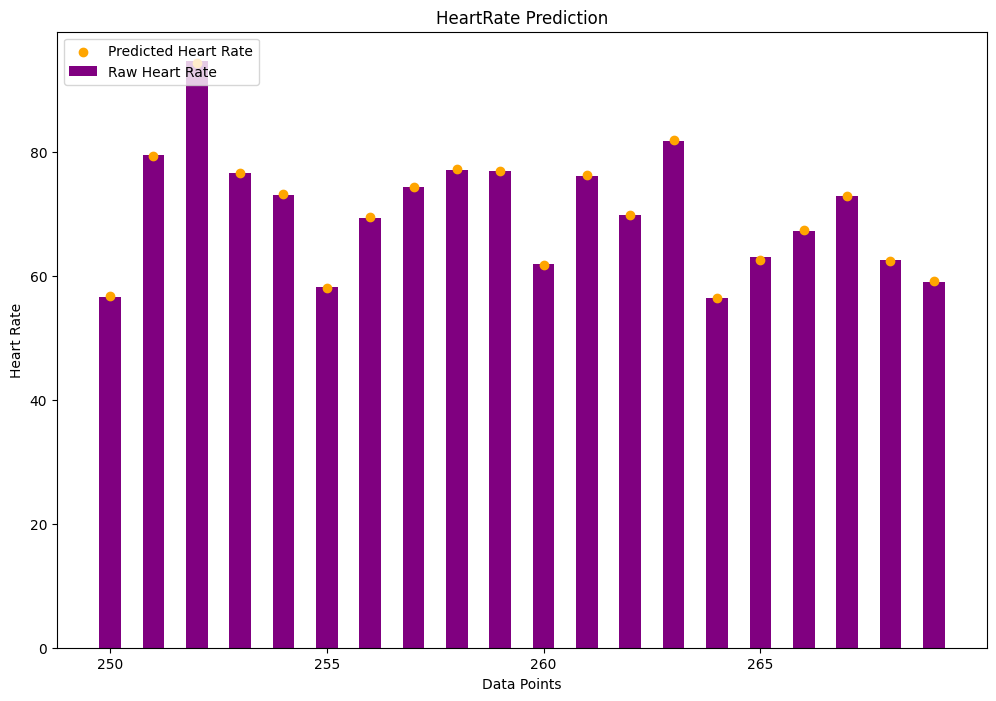

In [93]:
# Example 3

plt.figure(figsize=(12, 8))
plt.bar(range(250,270), y_valid[250:270], color = 'purple', label="Raw Heart Rate", width=0.5)
plt.scatter(range(250,270), pred_gdb[250:270], color = 'orange', label="Predicted Heart Rate")
plt.xticks(np.arange(250,270,5))
plt.xlabel("Data Points")
plt.ylabel("Heart Rate")
plt.title("HeartRate Prediction")
plt.legend(loc="upper left")
plt.show()